In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Download AAPL stock data
data = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
data = data[['Close']].dropna()

# Normalize
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data[['Close']])

C:\Users\bbuser\AppData\Local\Temp\ipykernel_19756\2818696879.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [4]:
def create_ffnn_dataset(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    return np.array(X), np.array(y)

window_size = 20
X_ffnn, y_ffnn = create_ffnn_dataset(data['Close'].values, window_size)

# Train-test split
split = int(len(X_ffnn) * 0.8)
X_train_ffnn, X_test_ffnn = X_ffnn[:split], X_ffnn[split:]
y_train_ffnn, y_test_ffnn = y_ffnn[:split], y_ffnn[split:]

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

ffnn = Sequential([
    Dense(64, activation='relu', input_shape=(window_size,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

ffnn.compile(optimizer='adam', loss='mae')
ffnn.fit(X_train_ffnn, y_train_ffnn, epochs=20, batch_size=32, validation_split=0.1)

C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1258 - val_loss: 0.0564
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0695 - val_loss: 0.0535
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0524 - val_loss: 0.0379
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0435 - val_loss: 0.0451
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0397 - val_loss: 0.0441
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0357 - val_loss: 0.1022
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0343 - val_loss: 0.0723
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0303 - val_loss: 0.0807
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0270 - val_loss: 0.0690
Epoch 10/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0305 - val_loss: 0.0815
Epoch 11/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0268 - val_loss: 0.0825
Epoch 12/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0

In [12]:
def create_rnn_dataset(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    return np.array(X).reshape(-1, window_size, 1), np.array(y)

X_rnn, y_rnn = create_rnn_dataset(data['Close'].values, window_size)
X_train_rnn, X_test_rnn = X_rnn[:split], X_rnn[split:]
y_train_rnn, y_test_rnn = y_rnn[:split], y_rnn[split:]

In [13]:
from keras.layers import LSTM, GRU

def build_rnn_model(cell='LSTM'):
    model = Sequential()
    if cell == 'LSTM':
        model.add(LSTM(64, return_sequences=False, input_shape=(window_size, 1)))
    else:
        model.add(GRU(64, return_sequences=False, input_shape=(window_size, 1)))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mae')
    return model

rnn_model = build_rnn_model(cell='LSTM')  # or 'GRU'
rnn_model.fit(X_train_rnn, y_train_rnn, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20


C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.1393 - val_loss: 0.0496
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0426 - val_loss: 0.0469
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0375 - val_loss: 0.0207
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0305 - val_loss: 0.0200
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0308 - val_loss: 0.0197
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0313 - val_loss: 0.0252
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0297 - val_loss: 0.0189
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0303 - val_loss: 0.0215
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0283 - val_loss: 0.0292
Epoch 10/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0287 - val_loss: 0.0179
Epoch 11/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0262 - val_loss: 0.0367
Epoch 12/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0270 - val_l

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
FFNN MAE: 0.0940
RNN MAE: 0.0286


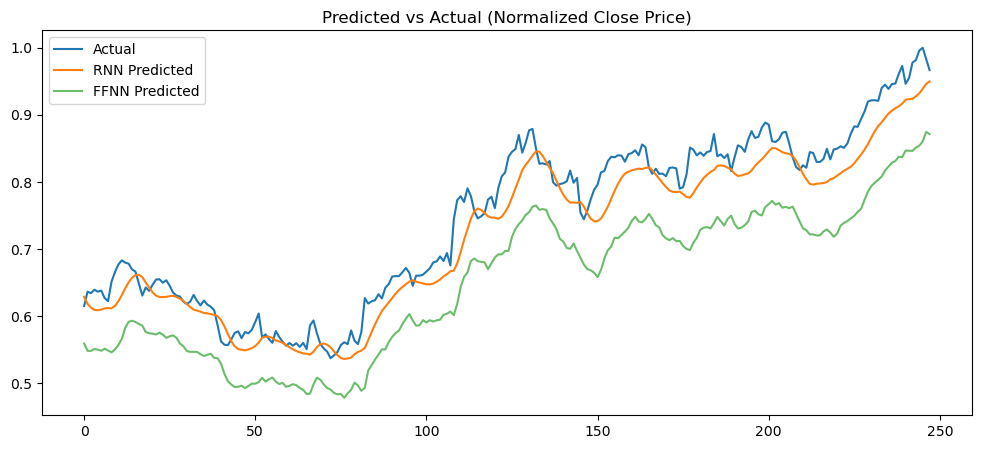

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# FFNN predictions
y_pred_ffnn = ffnn.predict(X_test_ffnn)
mae_ffnn = mean_absolute_error(y_test_ffnn, y_pred_ffnn)

# RNN predictions
y_pred_rnn = rnn_model.predict(X_test_rnn)
mae_rnn = mean_absolute_error(y_test_rnn, y_pred_rnn)

print(f"FFNN MAE: {mae_ffnn:.4f}")
print(f"RNN MAE: {mae_rnn:.4f}")

# Plot
plt.figure(figsize=(12, 5))
plt.plot(y_test_rnn, label='Actual')
plt.plot(y_pred_rnn, label='RNN Predicted')
plt.plot(y_pred_ffnn, label='FFNN Predicted', alpha=0.7)
plt.legend()
plt.title("Predicted vs Actual (Normalized Close Price)")
plt.show()